<a href="https://colab.research.google.com/github/wajdimusofa/10222140_Wajdi-Musofa_As/blob/main/10222140_Wajdi_Musofa_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding
Kasus: Analisis sentimen postingan media sosial (Twitter, Instagram, Facebook).

Tujuan: Mengklasifikasikan teks menjadi Positive, Negative, atau Neutral.

Manfaat: Memberikan insight tentang opini publik yang bisa dipakai untuk riset atau strategi bisnis.

In [25]:
# Data Set analisis sentimen
df = pd.read_csv('sentimentdataset.csv')
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## Data Understanding

Jumlah baris: 732
Rata-rata panjang teks: 13.206284153005464
Duplikasi: 0
Data kosong:
 Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


/tmp/ipython-input-3136772096.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


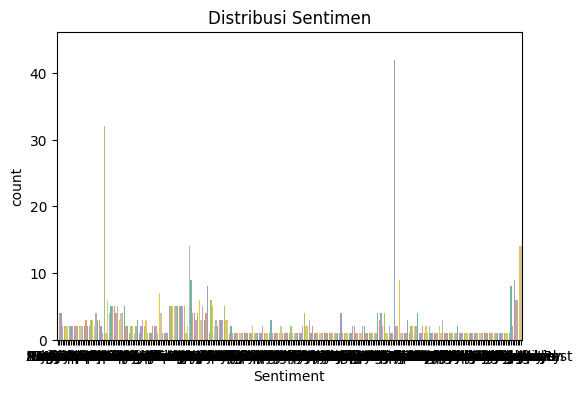

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('sentimentdataset.csv')
df.head()

# Jumlah baris
print("Jumlah baris:", len(df))

# Panjang rata-rata teks
avg_len = df['Text'].apply(lambda x: len(str(x).split())).mean()
print("Rata-rata panjang teks:", avg_len)

# Cek duplikasi & data kosong
print("Duplikasi:", df.duplicated().sum())
print("Data kosong:\n", df.isnull().sum())

# Distribusi sentimen
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Distribusi Sentimen")
plt.show()


## Data Preparation

In [28]:
import nltk, re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)         # hapus tanda baca & angka
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    tokens = [stemmer.stem(w) for w in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['Text'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Label Endcoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['Sentiment'])


# TF - IDF Vectorization

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label_encoded']


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Split Data (80:20)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [33]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

svm_model = SVC()
svm_model.fit(X_train, y_train)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

#Evaluation

SVM Accuracy: 0.14285714285714285
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


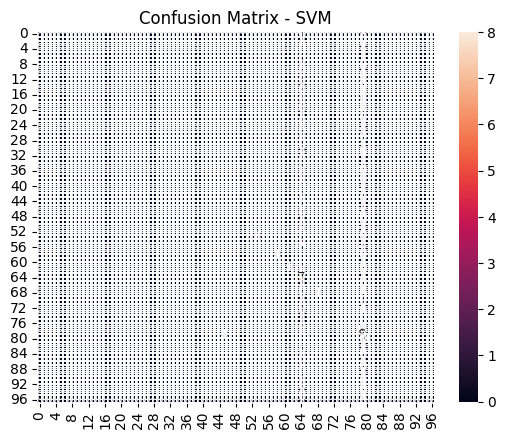

Naive Bayes Accuracy: 0.10884353741496598
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


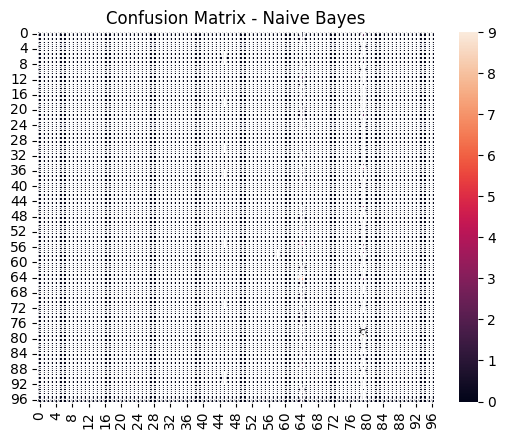

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluasi SVM
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.show()

# Evaluasi Naive Bayes
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


#Perbandingan Akurasi

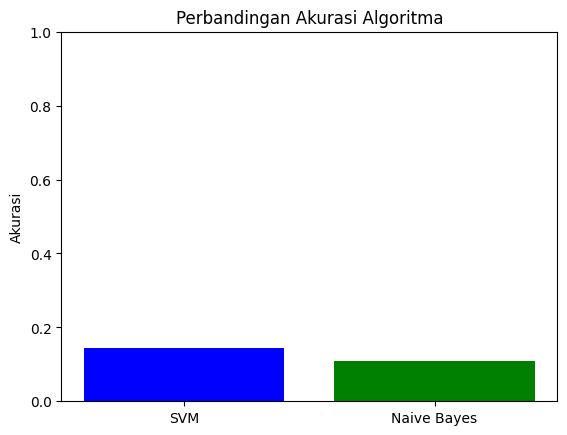

In [35]:
algorithms = ['SVM', 'Naive Bayes']
accuracies = [accuracy_score(y_test, svm_pred), accuracy_score(y_test, nb_pred)]

plt.bar(algorithms, accuracies, color=['blue','green'])
plt.title("Perbandingan Akurasi Algoritma")
plt.ylabel("Akurasi")
plt.ylim(0,1)
plt.show()


# Prediction

In [36]:
new_texts = ["I love this product!",
             "Traffic jam ruined my day",
             "Cooking dinner tonight"]

new_vec = vectorizer.transform([clean_text(t) for t in new_texts])

print("Prediksi SVM:", le.inverse_transform(svm_model.predict(new_vec)))
print("Prediksi Naive Bayes:", le.inverse_transform(nb_model.predict(new_vec)))


Prediksi SVM: [' Positive  ' ' Positive  ' ' Positive  ']
Prediksi Naive Bayes: [' Positive  ' ' Positive  ' ' Positive  ']
